In [63]:
# Importing necessary libraries for credit card fraud detection project
# - numpy: for numerical operations and array manipulations
# - pandas: for data manipulation and analysis
# - matplotlib & seaborn: for data visualization
# - sklearn: for machine learning algorithms and data preprocessing
# - imbalanced-learn: for handling imbalanced datasets
# - warnings: to handle warning messages gracefully
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')

In [6]:
# loading our dataset from a csv format into a pandas dataframe
creditcard_data = pd.read_csv('C:/Users/USER/Downloads/creditcard/creditcard.csv')

In [7]:
# oberserving the first five rows of the data
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# now lets get some information about the data
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# The above shows that the dataset has no missing values

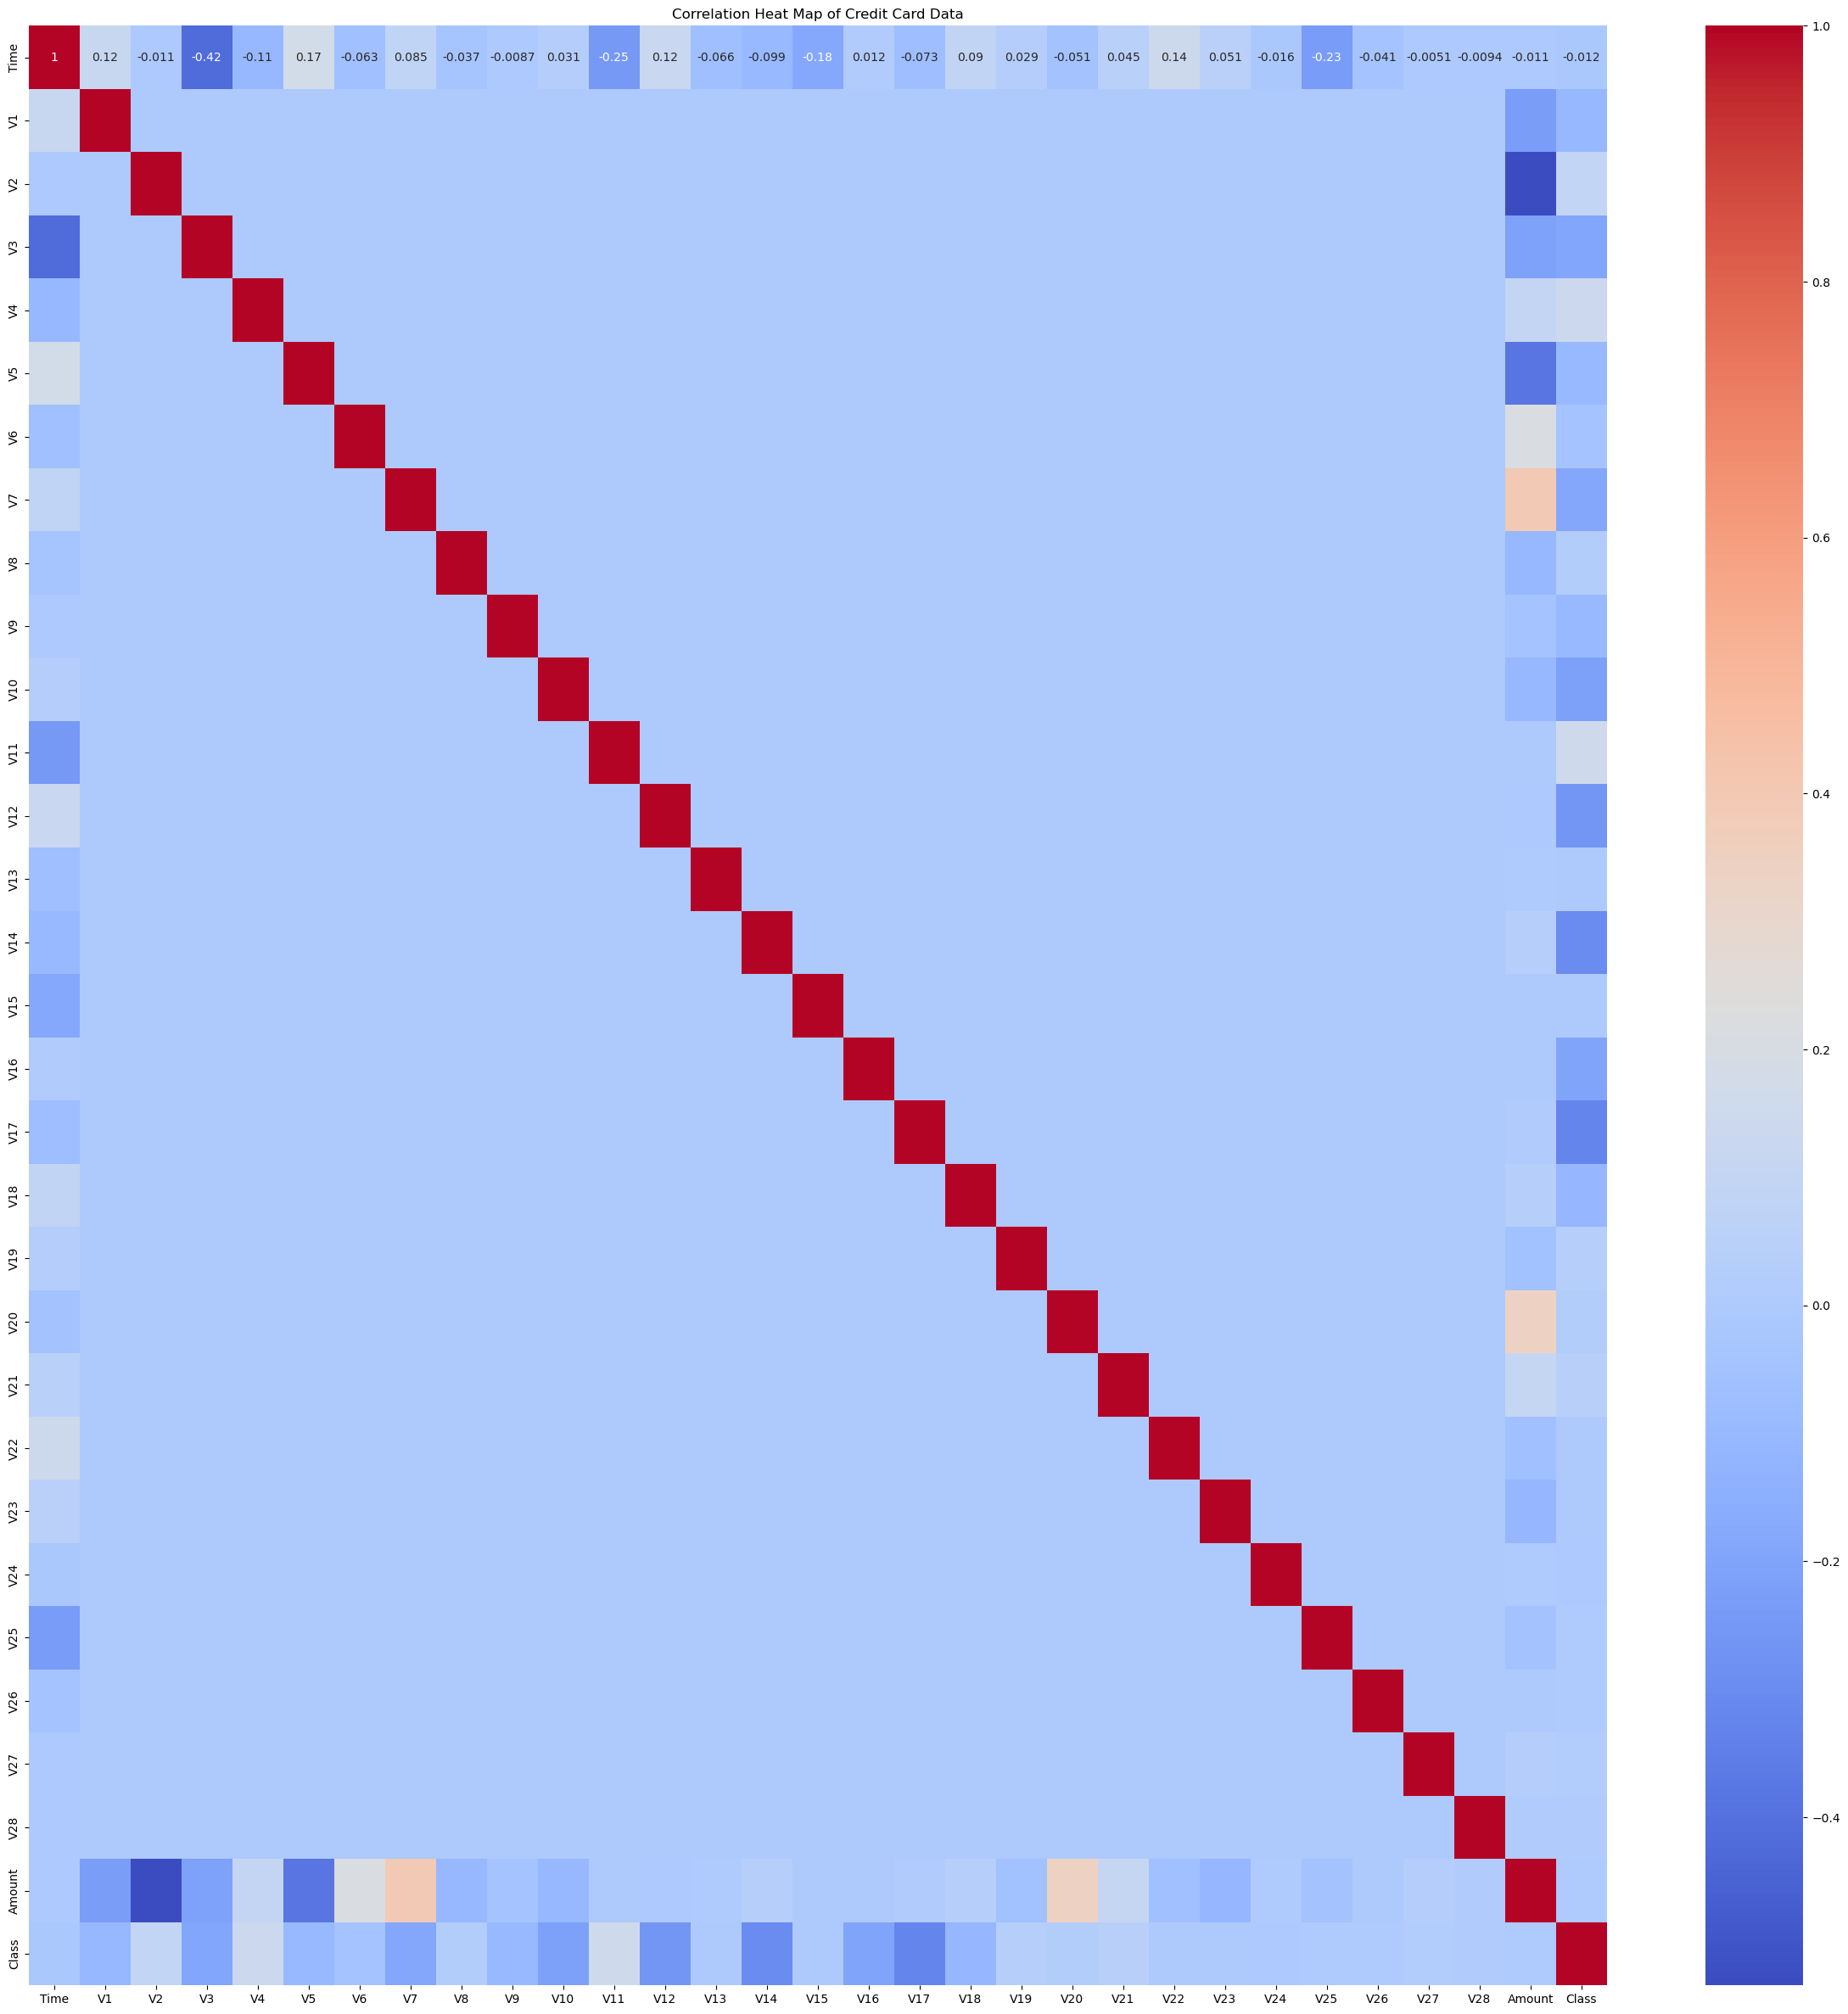

In [30]:
# We can check the correlation between the columns of this dataset (CORRELATION MATRIX)

correlation_matrix = creditcard_data.corr()
plt.figure(figsize = (30, 30))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heat Map of Credit Card Data')
plt.show()

In [ ]:
# OBSERVATIONS
# There's no much correlation between two different featues or a feature and the target 
# This eliminates any doubt of target or dataset leakage

In [18]:
# we can also check the distribution of the data
# let's start with the PCA classes labeled V1 to V28
# lets create a temporary data frame to host the PCA classes
temp_data = creditcard_data.drop(['Time', 'Amount', 'Class'], axis = 1)

In [19]:
# checking the temp data
temp_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [22]:
# the columns are successfully dropped
# now let us visualize their distribution

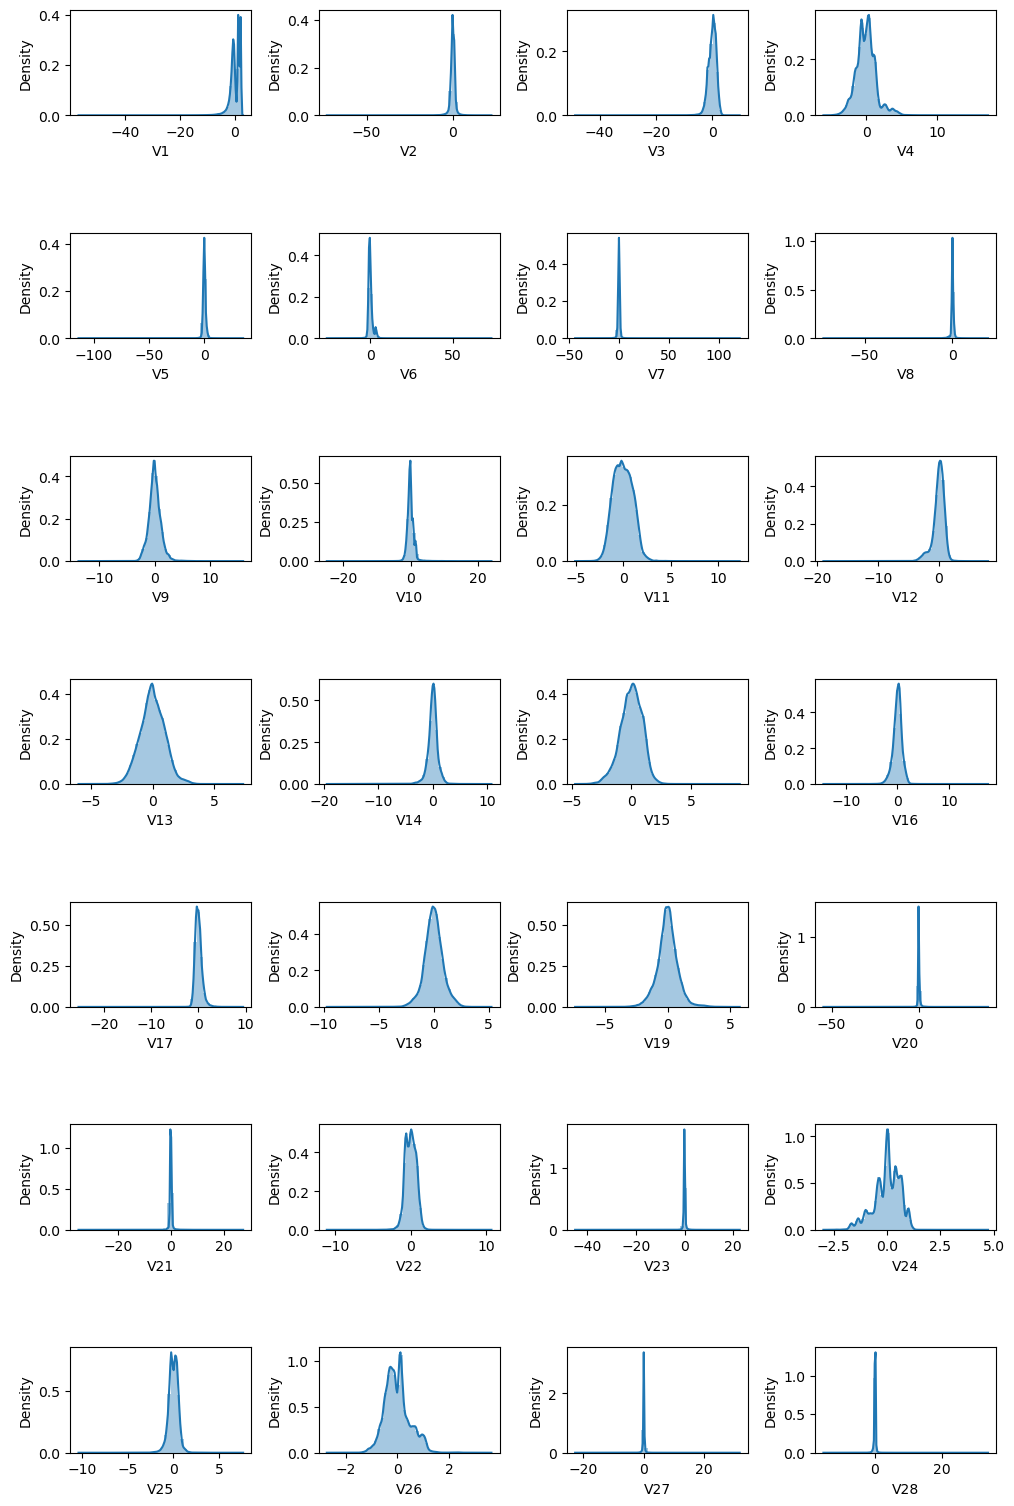

In [25]:
# creating a  4 x 7 grid for the subplots of the PCA columns
fig, ax = plt.subplots(ncols = 4, nrows = 7, figsize = (10, 15))

# now lets create the distribution graph
index = 0  # initializing index for looping
ax = ax.flatten() # this is done so we could successfuly use loop to plot the graph since ax is a 2D numpy array

for col in temp_data.columns:
    sns.distplot(temp_data[col], ax = ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.5, h_pad = 5)


In [26]:
# OBSERVATIONS FROM THE GRAPH
# on second approval, we can say the featues V1 - V28 were scaled not only for confidentiality but this will also help gradient descent run faster
# Since most data points are near the same value, any points that are far from this value are rare and might be outliers.
# The graph shows that most of the feature values are packed closely around a central point, forming a sharp peak.
# This means that the values don't vary much, and most of them are similar.
# This can be useful for building models because it indicates a predictable pattern in the data.

In [32]:
creditcard_data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

<Figure size 2000x3000 with 0 Axes>

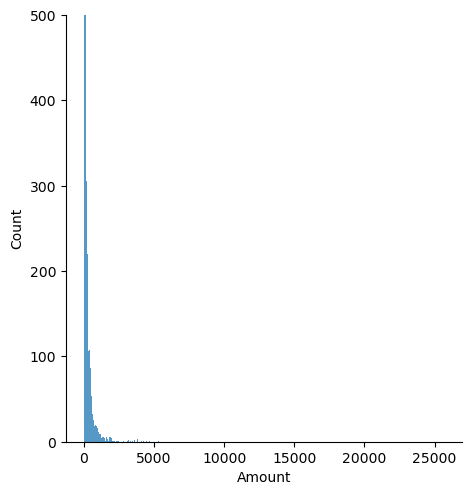

In [38]:
# Now lets get to the non PCA features [ Time and Amount]
plt.figure(figsize = (20, 30))
sns.displot(creditcard_data['Amount'])
plt.ylim(0, 500)
plt.show()

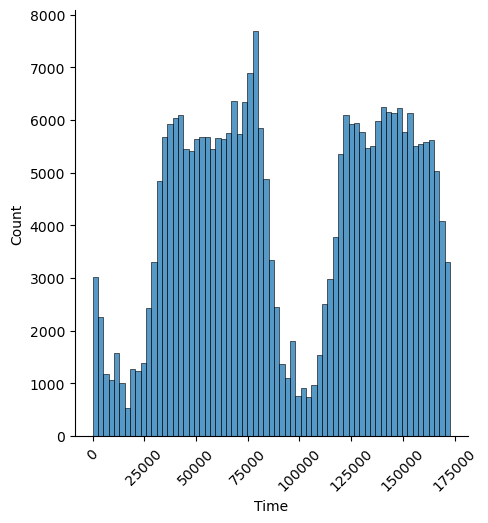

In [40]:
# now let's see for the the Time class
sns.displot(creditcard_data['Time'])
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# The above data set has a very large Standard deviation 
# compare to the other features especially V1 to V6, we have to scale the 'Time' column
# Many machine learning algorithms, such as linear regression, logistic regression, support vector machines (SVM), and neural networks,
# perform better or converge faster when features are on a similar scale and close to a standard normal distribution
# (mean of 0 and standard deviation of 1).
# Scaling ensures that all features contribute equally to the model fitting process without one feature dominating due to its larger range of values.
            # ALSO
# Algorithms that use gradient descent for optimization
# converge faster when features are scaled. This is because gradient descent moves faster towards the minimum of the cost function 
# when the features are similarly scaled.

In [41]:
# input split
X = creditcard_data.drop(['Class'], axis  = 1)
y = creditcard_data['Class']

In [44]:
# Now Scaling the 'Time' column
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

# data loses column names so we reassign it
X_scaled.columns = X.columns

In [46]:
# Observe the scaled values
X_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-3.065637e-16,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,...,-1.247411e-18,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,2.913952e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.996583e+00,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-8.552120e-01,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,-2.131453e-01,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,9.372174e-01,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.642058e+00,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [17]:
# let's see the target which is the column 'Class'
creditcard_data['Class'].unique()

array([0, 1], dtype=int64)

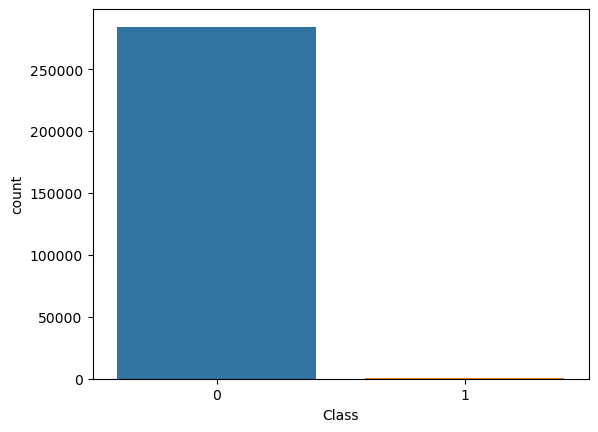

In [51]:
# the target class has two uniques; labeled 0 and 1
# 0 --> Legit transaction   and   1 --> Fraudulent transaction  
# now lets check their distribution.
sns.countplot(x = 'Class', data = creditcard_data)
plt.show()

In [52]:
# Now per the graph above, the data we have is  highly unbalanced ans sometimes it will be so bad to use unbalanced data train the model
# lets train the model with the unbalance data and see

In [57]:
# spliting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42, stratify = y)

In [64]:
# model training
model_1 = LogisticRegression()

model_1.fit(X_train,y_train)

# model testing
y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

F1_score:  0.719626168224299


In [62]:
# looking at the support 7109 of the legit transaction rows were used and 123 of the fradulent roles
# there the precision, recall and f1-score of the fradulent class are very low while the legit class has everything perfect

In [65]:
# model training
model_2 = RandomForestClassifier()

model_2.fit(X_train,y_train)

# model testing
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.77      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1_score:  0.852017937219731


In [66]:
# we can see that the RandomForestClassifier is a better model to use. Even though the score is not good despite using a large data
# so we can simply slove this by balancing the data

In [67]:
# IMBALANCING THE DATASET
over_sampling = SMOTE()
X_smote, y_smote = over_sampling.fit_resample(X_train, y_train)

In [85]:
y_smote.value_counts()

Class
0    213236
1    213236
Name: count, dtype: int64

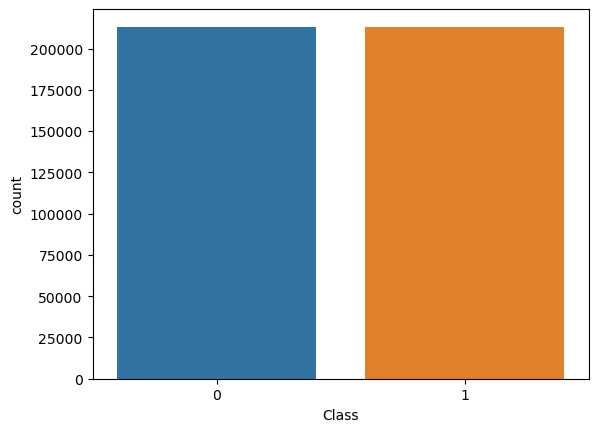

In [86]:
sns.countplot(x=y_smote)
plt.show()

In [87]:
# the above shows that we have equal number of both legit cases and fradulent ones
# Now let train our models with The balanced data

In [88]:
# model training
model_3 = RandomForestClassifier()

model_3.fit(X_smote,y_smote)

# model testing
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.77      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1_score:  0.852017937219731


In [ ]:
# lets see that through a tuning we can make the model better
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_smote, y_smote)
print(grid_search.best_params_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
